Job Status: job has successfully run


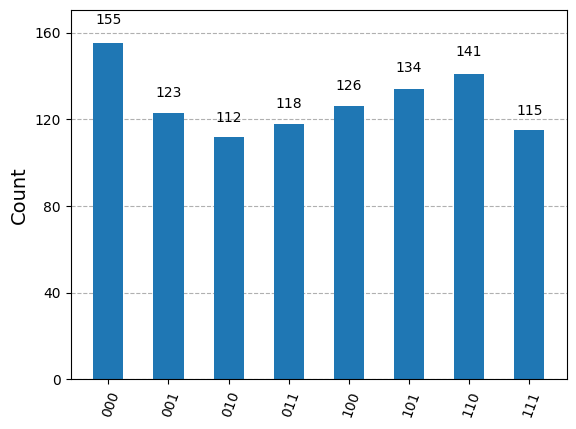

In [2]:
	import qiskit
	from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
	from qiskit_aer import Aer
	from qiskit.quantum_info import Statevector, state_fidelity
	from qiskit.visualization import plot_bloch_multivector
	from qiskit_ibm_provider.job import job_monitor
	from qiskit.visualization import plot_histogram
	import numpy as np
	
	# Create a quantum circuit with 3 qubits and 3 classical bits
	qc = QuantumCircuit(3, 3)
	
	# Initialize qubit [0] in the |+> state
	qc.h(0)
	
	# Entangle qubits [1] and [2]
	qc.h(1)
	qc.cx(1, 2)
	
	# Perform Bell-state measurement on qubits [0] and [1]
	qc.cx(0, 1)
	qc.h(0)
	qc.measure([0, 1], [0, 1])
	
	# Based on measurement results, apply corrections to qubit [2]
	# If outcome is `10', apply X gate to qubit [2]
	qc.x(2).c_if(qc.cregs[0], 2)
	# If outcome is `01', apply Z gate to qubit [2]
	qc.z(2).c_if(qc.cregs[0], 1)
	# If outcome is `11', apply both X and Z gates to qubit [2]
	qc.x(2).c_if(qc.cregs[0], 3)
	qc.z(2).c_if(qc.cregs[0], 3)
	
	# Measure qubit [2]
	qc.measure(2, 2)
	
	# Execute the circuit on the qasm simulator
	simulator = Aer.get_backend('qasm_simulator')
	transpiled_circuit = qiskit.transpile(qc, simulator)
	job = simulator.run(transpiled_circuit, shots=1024)
	job_monitor(job)
	result = job.result()
	
	# Get the measurement results
	counts = result.get_counts()
	
	# Plot the results
	plot_histogram(counts)	